In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:/UVA\Thesis/cousera data/merge data.csv", encoding = "utf-8")
df.head(3)

,reviews,ratings,votes,class,classnum
0,Too many introductory lessons that aren't usef...,1,185,bad,-1
1,This was extremely basic and not much help. I ...,1,67,bad,-1
2,"I liked the videos a lot, I just didn't get th...",4,50,neutral,0


In [47]:
df.shape

(14204, 5)

In [48]:
df[7553:7565]

,reviews,ratings,votes,class,classnum
7553,./,4,0,neutral,0
7554,.,4,0,neutral,0
7555,E,4,0,neutral,0
7556,t,4,0,neutral,0
7557,<U+200B>,4,0,neutral,0
7558,A,4,0,neutral,0
7559,<U+200B>,4,0,neutral,0
7560,<U+200B>,4,0,neutral,0
7561,4,4,0,neutral,0
7562,<U+200B>,4,0,neutral,0


In [49]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', str(text))
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [50]:
df['reviews'] = df['reviews'].apply(preprocessor)

In [51]:
df[7553:7565]

,reviews,ratings,votes,class,classnum
7553,,4,0,neutral,0
7554,,4,0,neutral,0
7555,e,4,0,neutral,0
7556,t,4,0,neutral,0
7557,,4,0,neutral,0
7558,a,4,0,neutral,0
7559,,4,0,neutral,0
7560,,4,0,neutral,0
7561,4,4,0,neutral,0
7562,,4,0,neutral,0


In [52]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

porter = PorterStemmer()

# Easy basic tokenization
def tokenizer(text):
    return word_tokenize(text)


# tokenization + stemming
def tokenizer_porter(text):
    return [porter.stem(word) for word in word_tokenize(text)]

In [53]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10435\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords

In [55]:
stop = stopwords.words('english')+["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv']+["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv']

In [56]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews'].head()

0    many introductory lessons useful week 1 2 3 te...
1    extremely basic much help see contribute findi...
2           liked videos lot get point journal entries
3    overall thought great introduction topics cove...
4    gives great foundation data analytics instruct...
Name: reviews, dtype: object

In [58]:
freq = pd.Series(' '.join(df["reviews"]).split()).value_counts()[:15]

freq

course       8216
data         4535
great        2943
good         2259
really       1355
analytics    1178
google       1098
analysis     1033
lot           991
learn         971
well          945
learning      936
excellent     896
thank         837
easy          808
dtype: int64

In [59]:
freq1 = list(freq.index)
df["reviews"] = df["reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))

In [60]:
freqq = pd.Series(' '.join(df["reviews"]).split()).value_counts()[-1000:]
freqq

tutored        1
freelanced     1
englighting    1
concretize     1
erase          1
              ..
strive         1
ignored        1
tiny           1
nuisance       1
headache       1
Length: 1000, dtype: int64

In [61]:
freqq1 = list(freqq.index)
df["reviews"] = df["reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in freqq1))

In [62]:
df.shape

(14204, 5)

In [63]:
minReviewLen = 15

DF = df[df["reviews"].str.len() > minReviewLen]

In [64]:
DF.shape

(9874, 5)

In [65]:
import re
 
def remove(text):
    remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    return re.sub(remove_chars, '', text)

In [66]:
DF["reviews"]=DF["reviews"].apply(remove)

C:\Users\10435\AppData\Local\Temp/ipykernel_42112/4041434018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["reviews"]=DF["reviews"].apply(remove)


In [67]:
DF.head()

,reviews,ratings,votes,class,classnum
0,many introductory lessons useful week teach...,1,185,bad,-1
1,extremely basic much help see contribute findi...,1,67,bad,-1
2,liked videos get point journal entries,4,50,neutral,0
3,overall thought introduction topics covered ce...,3,47,neutral,0
4,gives foundation instructors skim everything l...,5,33,good,1


In [23]:
import warnings
from gensim.corpora.dictionary import Dictionary
from gensim.models.phrases import Phrases
import tqdm
import logging

from gensim.models import CoherenceModel
from gensim.models import LdaMulticore

warnings.filterwarnings("ignore", category=DeprecationWarning)

df_stopped = DF["reviews"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_stopped_tokenized = df_stopped.apply(tokenizer)
df_stopped_tokenized.head()


dictionary = Dictionary(df_stopped_tokenized)

# Filter out words that occur less than 10 documents, or more than 90% of the documents.
# Same effect as min_df, max_df in CountVectorizer 
dictionary.filter_extremes(no_below=5, no_above=0.9)
dictionary.compactify()

corpus = [dictionary.doc2bow(txt) for txt in df_stopped_tokenized]



MULTICORE = True
import psutil
NUM_CORES = psutil.cpu_count(logical=False)




gensim_logger = logging.getLogger('gensim.models.ldamodel')
gensim_logger.setLevel(logging.DEBUG)

history = []
Ks = [4, 6, 8, 10, 20, 50, 100]

for K in tqdm.tqdm(Ks):
    
    lda_k = LdaMulticore(
            corpus=corpus, 
            id2word=dictionary,
            num_topics=K, 
            iterations=100,
            passes=20,
            eval_every=None,
            random_state=42,
            workers=NUM_CORES - 1              # Adjust it to your computer: Number of CPU Cores - 1
        )

    coherence_umass = CoherenceModel(
            model=lda_k, 
            corpus=corpus,
            dictionary=dictionary, 
            coherence='u_mass'
        )
    umass = coherence_umass.get_coherence()


    history.append({'K': K, 'model': lda_k,'umass': umass,})

100%|██████████| 7/7 [02:23<00:00, 20.47s/it]


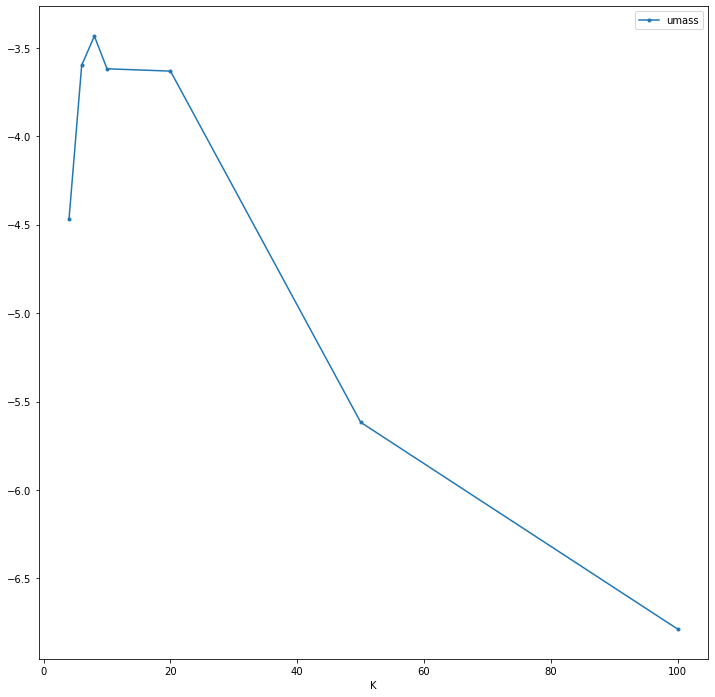

In [24]:
df_score = pd.DataFrame(history).set_index('K')
_ = df_score[['umass']].plot.line(marker='.', figsize=(12, 12))

In [26]:
from gensim.models.ldamodel import LdaModel
lda = LdaModel(
    corpus=corpus, 
    id2word=dictionary,
    num_topics=4, 
    alpha='auto',
    eta='auto',
    iterations=100,
    passes=20,
    eval_every=None,
    random_state=42,
    per_word_topics=True
)

lda.print_topics()

[(0,
  '0.026*"instructor" + 0.020*"content" + 0.019*"amazing" + 0.018*"best" + 0.017*"thanks" + 0.017*"way" + 0.017*"understand" + 0.015*"courses" + 0.014*"much" + 0.014*"enjoyed"'),
 (1,
  '0.019*"sql" + 0.016*"skills" + 0.016*"analyst" + 0.014*"new" + 0.012*"information" + 0.011*"basic" + 0.011*"also" + 0.010*"concepts" + 0.009*"knowledge" + 0.009*"useful"'),
 (2,
  '0.048*"step" + 0.045*"de" + 0.031*"que" + 0.026*"curso" + 0.020*"el" + 0.020*"en" + 0.019*"muy" + 0.017*"para" + 0.015*"clean" + 0.014*"la"'),
 (3,
  '0.018*"questions" + 0.013*"videos" + 0.012*"like" + 0.011*"bit" + 0.010*"time" + 0.010*"one" + 0.009*"video" + 0.009*"material" + 0.008*"sql" + 0.008*"little"')]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF["reviews"], DF["class"], test_size=0.2, stratify=DF["class"], random_state=42)

In [69]:
X_train.head()

2398              got know alot hope help finding new job
3033             marks awesome help analyst job searching
2243    everything clearly presented every exercise fe...
27      imagined throughout steps lifecycle repeated s...
148     far introductory graduate degree found things ...
Name: reviews, dtype: object

In [26]:
from sklearn.utils import resample

X_train_rsp,y_train_rsp = resample(X_train[y_train == 1],
                       y_train[y_train == 1],
                       replace = True, 
                       n_samples = X_train[y_train== 4].shape[0],
                       random_state = 42)

X_train_rsp1,y_train_rsp1 = resample(X_train[y_train == 2],
                         y_train[y_train == 2],
                         replace = True, 
                         n_samples = X_train[y_train== 4].shape[0],
                         random_state = 42)

X_train_rsp2,y_train_rsp2 = resample(X_train[y_train == 3],
                         y_train[y_train == 3],
                         replace = True, 
                         n_samples = X_train[y_train== 4].shape[0],
                         random_state = 42)
X_train_rsp3,y_train_rsp3 = resample(X_train[y_train == 5],
                         y_train[y_train == 5],
                         replace = True, 
                         n_samples = X_train[y_train== 4].shape[0],
                         random_state = 42)
X_train_bal = np.hstack((X_train[y_train == 4],X_train_rsp3,X_train_rsp2,X_train_rsp1,X_train_rsp ))
y_train_bal = np.hstack((y_train[y_train== 4], y_train_rsp3,y_train_rsp2,y_train_rsp1,y_train_rsp))


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import roc_auc_score



tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=True,
                        preprocessor=None)

In [71]:


param_grid = {'vect__ngram_range': [(1, 1),(1,2),(1,3)],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__C': np.logspace(-3, 3, num=7),
               'vect__use_idf':[True, False]}
            

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=42, solver="saga",multi_class = "multinomial",class_weight = "balanced",penalty= "l2"))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='recall_macro',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_lr_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV recall: %.3f' % gs_lr_tfidf.best_score_)
clf = gs_lr_tfidf.best_estimator_
print (clf)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameter set: {'clf__C': 0.01, 'vect__ngram_range': (1, 2), 'vect__tokenizer': <function tokenizer at 0x000002889852A550>, 'vect__use_idf': True} 
CV recall: 0.640
Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function tokenizer at 0x000002889852A550>)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    multi_class='multinomial', random_state=42,
                                    solver='saga'))])


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=clf.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.26      0.64      0.37        88
        good       0.90      0.84      0.87      1523
     neutral       0.45      0.41      0.43       364

    accuracy                           0.75      1975
   macro avg       0.54      0.63      0.56      1975
weighted avg       0.79      0.75      0.77      1975



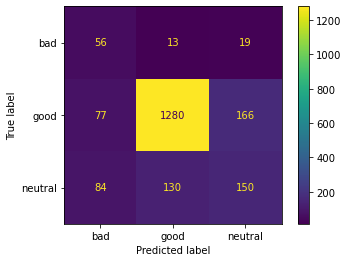

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

disp.plot()

In [31]:
stop1=stop+['much','becau',"'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv']

In [32]:
lr_tfidf=TfidfVectorizer(strip_accents=None,
                        lowercase=True,
                        preprocessor=None,
                        stop_words = stop1,
                        tokenizer= tokenizer,
                        use_idf=True,
                        ngram_range = (1,2))

X_train_bow = lr_tfidf.fit_transform(X_train)
X_test_bow = lr_tfidf.transform(X_test)

words = lr_tfidf.get_feature_names()

print(f'Vocabulary size: {len(words)}')
one_every_1000 = '\n'.join(words[::1000])
print(f'Sample:\n{one_every_1000}')

from sklearn.linear_model import LogisticRegressionCV
lr_clf = LogisticRegressionCV(max_iter=1e4,
                              Cs=[0.01,0.01,0.01,0.01], 
                              random_state=42,
                              solver='saga', 
                              multi_class='multinomial', 
                              cv=5, 
                              class_weight = "balanced",
                              penalty="l2").fit(X_train_bow, y_train)

print(lr_clf.coef_.shape)
print(f'Nb Classes: {lr_clf.coef_.shape[0]}, Nb Words: {lr_clf.coef_.shape[1]}')

coefs = pd.DataFrame([{'class': lr_clf.classes_[i], 'word': words[j], 'coef': co} for (i, j), co in np.ndenumerate(lr_clf.coef_)])

sort_by_coef = coefs.groupby(['class']).apply(lambda x: x.sort_values('coef', ascending=False)).reset_index(drop=True)



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Vocabulary size: 62216
Sample:
abarca
aim develop
amazing thing
aplicar definitivamente
augen
becomes bit
bigquery sql
capstone experience
chunk based
communication
conduct
correct one
curo de
degree difference
digest quite
efectiva manejo
enjoyed opportunity
ever lots
exhaust working
exposed programs
felt bit
follow see
full description
give completion
group directly
helpful easier
illuminating
information new
instructor led
introduction ability
keep going
las consideraciones
level jumped
logics
makes new
mejor es
muy muy
notebook
order properly
participating discussions
placement assistance
pragmatic straight
process included
provides solid
quite useful
recommend fromgoogle
resources understand
schools colleges
share motivating
skills visualization
split function
stemmed
style level
taking another
terminologies
thinking coding
tony presented
tutoring
unworthy
various teaching
watching short
wonderful mix
zip
(3, 62216)
Nb Classes: 3, Nb Words: 62216


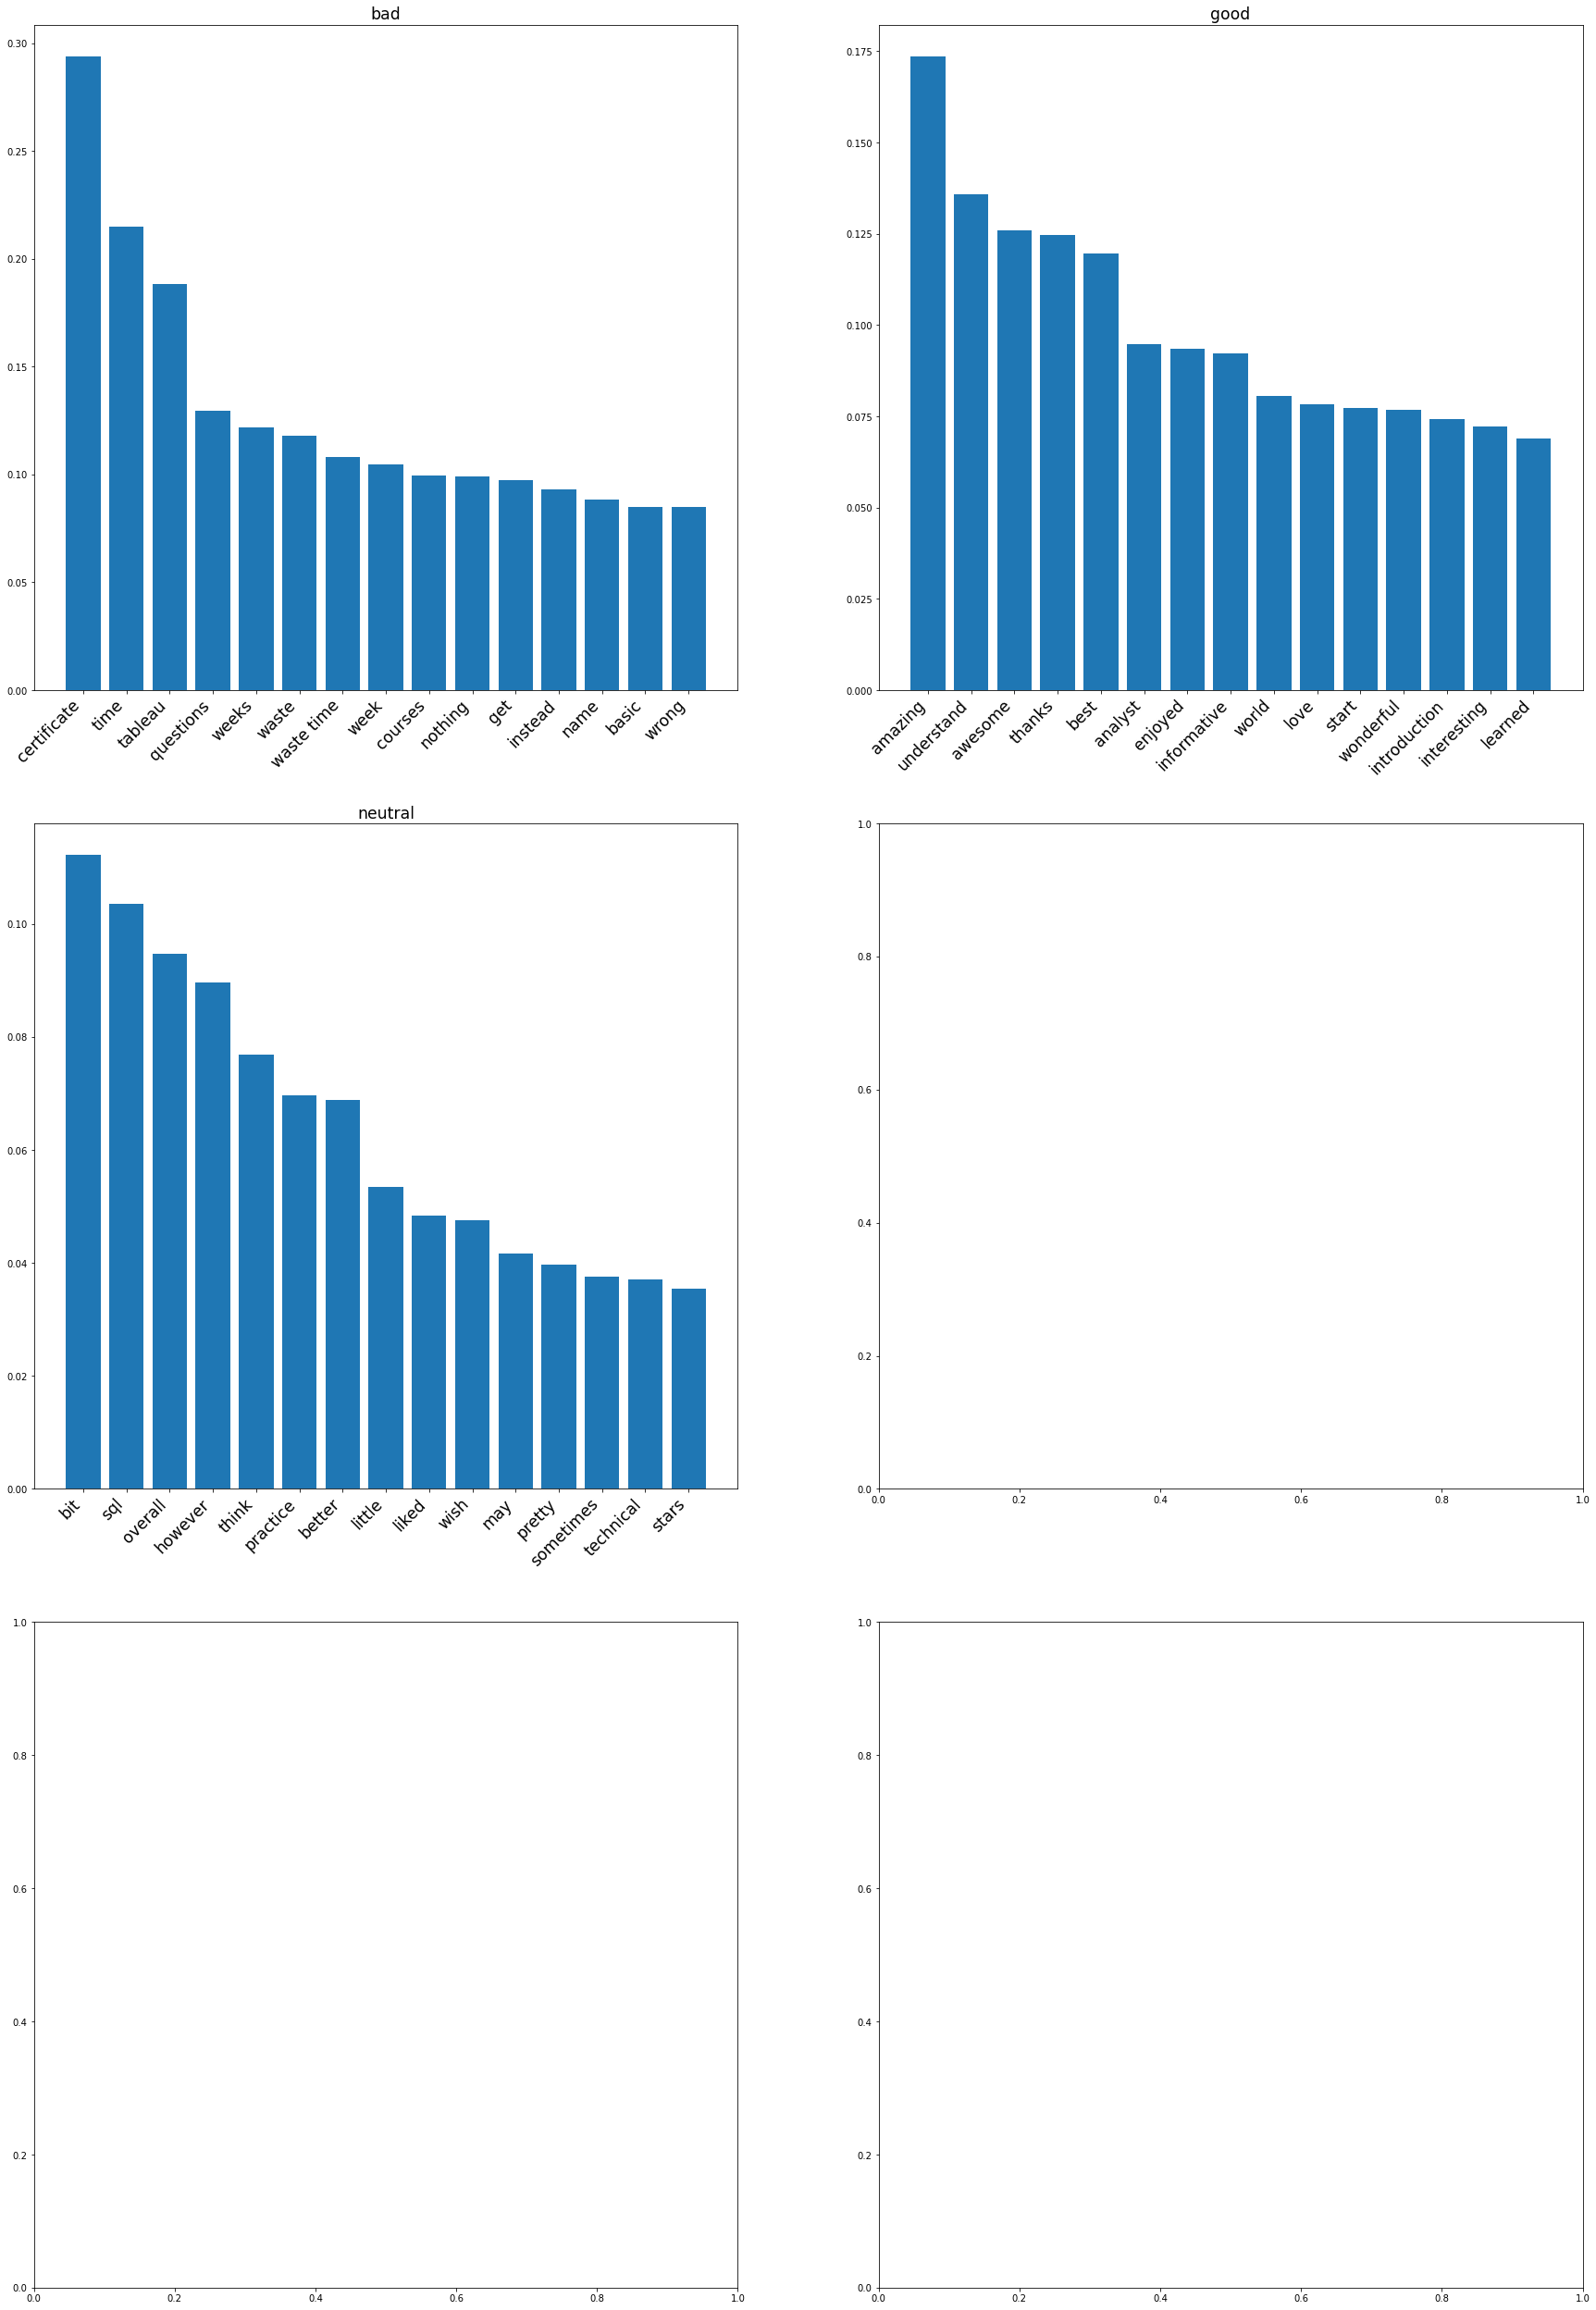

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 45))

cut = 15

for ((_, _), ax), (c, g) in zip(np.ndenumerate(axs), sort_by_coef.groupby('class')):
    t_cut = g.head(cut)
    ax.bar(x=range(cut), height=t_cut['coef'])
    ax.set_xticks(range(cut))
    ax.set_xticklabels(t_cut['word'], rotation=45, ha='right',fontsize='xx-large')
    ax.set_title(c,fontsize='xx-large')
plt.savefig("E:/UVA\Thesis/cousera data/visualization1.png",dpi=1000)
plt.show()


In [44]:
# SVM linear
from sklearn.svm import SVC


svm_param_grid = {
    'vect__ngram_range': [(1, 1),(1,2),(1,3)],
    'vect__tokenizer': [tokenizer, tokenizer_porter],
    'vect__use_idf':[True, False],
    'clf__C': np.logspace(-2, 2, 5)  # generate 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000
}

svm_tfidf = Pipeline([('vect', tfidf),
                     ('clf', SVC(probability=True, kernel="linear", class_weight="balanced"))])

gs_svm_tfidf = GridSearchCV(svm_tfidf, svm_param_grid,
                           scoring= 'recall_macro',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_svm_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_svm_tfidf.best_params_)
print('CV recall: %.3f' % gs_svm_tfidf.best_score_)
clf1 = gs_svm_tfidf.best_estimator_
print('Test recall: %.3f' % clf1.score(X_test, y_test))
print (clf1)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameter set: {'clf__C': 0.1, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenizer_porter at 0x000001C333025280>, 'vect__use_idf': True} 
CV recall: 0.623
Test recall: 0.741
Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer_porter at 0x000001C333025280>)),
                ('clf',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True))])


In [46]:
print(classification_report(y_true=y_test, y_pred=clf1.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.27      0.56      0.37        88
        good       0.91      0.82      0.86      1523
     neutral       0.40      0.47      0.43       364

    accuracy                           0.74      1975
   macro avg       0.53      0.61      0.55      1975
weighted avg       0.79      0.74      0.76      1975



In [45]:
# SVM with rbf kernel

rbfsvm_param_grid = {'vect__ngram_range': [(1, 1),(1,2),(1,3)],
               'vect__tokenizer': [tokenizer,tokenizer_porter],
               'vect__use_idf':[True,False],
               'clf__C': np.logspace(-2, 2, 5)}
              

rbfsvm_tfidf = Pipeline([('vect', tfidf),
                     ('clf', SVC(probability=True, kernel="rbf", class_weight="balanced"))])

gs_rbfsvm_tfidf = GridSearchCV(rbfsvm_tfidf, rbfsvm_param_grid,
                           scoring='recall_macro',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_rbfsvm_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_rbfsvm_tfidf.best_params_)
print('CV recall: %.3f' % gs_rbfsvm_tfidf.best_score_)
clf2 = gs_rbfsvm_tfidf.best_estimator_
print (clf2)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameter set: {'clf__C': 0.1, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenizer_porter at 0x000001C333025280>, 'vect__use_idf': False} 
CV recall: 0.574
Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer_porter at 0x000001C333025280>,
                                 use_idf=False)),
                ('clf', SVC(C=0.1, class_weight='balanced', probability=True))])


In [47]:
print(classification_report(y_true=y_test, y_pred=clf2.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.31      0.44      0.37        88
        good       0.90      0.77      0.83      1523
     neutral       0.37      0.55      0.44       364

    accuracy                           0.72      1975
   macro avg       0.53      0.59      0.55      1975
weighted avg       0.78      0.72      0.74      1975



In [80]:
from sklearn.tree import DecisionTreeClassifier

dt_tfidf = Pipeline([('vect', tfidf),
                     ('clf', DecisionTreeClassifier(criterion = "entropy"))])

dt_param_grid = {'vect__ngram_range': [(1, 1),(1,2),(1,3)],
               'vect__tokenizer': [tokenizer,tokenizer_porter],
               'vect__use_idf':[True,False],
               'clf__max_depth': range(20,50,5)}

gs_dt_tfidf = GridSearchCV(dt_tfidf, dt_param_grid,
                            scoring='recall_macro',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

gs_dt_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_dt_tfidf.best_params_)
print('CV recall: %.3f' % gs_dt_tfidf.best_score_)
clf3 = gs_dt_tfidf.best_estimator_
print (clf3)  

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameter set: {'clf__max_depth': 45, 'vect__ngram_range': (1, 2), 'vect__tokenizer': <function tokenizer_porter at 0x000002889852A700>, 'vect__use_idf': True} 
CV recall: 0.475
Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function tokenizer_porter at 0x000002889852A700>)),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=45))])


In [81]:
print(classification_report(y_true=y_test, y_pred=clf3.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.34      0.28      0.31        88
        good       0.83      0.91      0.87      1523
     neutral       0.43      0.27      0.34       364

    accuracy                           0.77      1975
   macro avg       0.54      0.49      0.51      1975
weighted avg       0.74      0.77      0.75      1975



In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn_tfidf = Pipeline([('vect', tfidf),
                     ('clf', KNeighborsClassifier(weights = "distance",metric = "cosine" ))])

knn_param_grid = {'vect__ngram_range': [(1, 1),(1,2),(1,3)],
               'vect__tokenizer': [tokenizer,tokenizer_porter],
               'vect__use_idf':[False,True],
               'clf__n_neighbors': range(5,31,1)}

gs_knn_tfidf = GridSearchCV(knn_tfidf, knn_param_grid,
                            scoring='recall_macro',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

gs_knn_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_knn_tfidf.best_params_)
print('CV recall: %.3f' % gs_knn_tfidf.best_score_)

clf4 = gs_knn_tfidf.best_estimator_
print (clf4)

Fitting 5 folds for each of 312 candidates, totalling 1560 fits
Best parameter set: {'clf__n_neighbors': 5, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenizer_porter at 0x000002889852A700>, 'vect__use_idf': False} 
CV recall: 0.438
Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer_porter at 0x000002889852A700>,
                                 use_idf=False)),
                ('clf',
                 KNeighborsClassifier(metric='cosine', weights='distance'))])


In [77]:
print(classification_report(y_true=y_test, y_pred=clf4.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.57      0.18      0.28        88
        good       0.81      0.97      0.89      1523
     neutral       0.51      0.19      0.28       364

    accuracy                           0.79      1975
   macro avg       0.63      0.45      0.48      1975
weighted avg       0.75      0.79      0.75      1975



In [82]:
from sklearn.ensemble import RandomForestClassifier


rf1_tfidf = Pipeline([('vect', tfidf),
                     ('clf', RandomForestClassifier(oob_score = True,class_weight = "balanced"))])

rf1_param_grid = {
    'vect__ngram_range': [(1, 1),(1,2),(1,3)],
    'vect__tokenizer': [tokenizer,tokenizer_porter],
    'vect__use_idf':[True,False],
    'clf__n_estimators': range(40,131,10)
}

gs_rf1_tfidf = GridSearchCV(rf1_tfidf, rf1_param_grid,
                            scoring='recall_macro',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

gs_rf1_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_rf1_tfidf.best_params_)
print('CV recall: %.3f' % gs_rf1_tfidf.best_score_)
clf5 = gs_rf1_tfidf.best_estimator_
print (clf5)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameter set: {'clf__n_estimators': 50, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenizer_porter at 0x000002889852A700>, 'vect__use_idf': True} 
CV recall: 0.412
Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer_porter at 0x000002889852A700>)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=50, oob_score=True))])


In [83]:
print(classification_report(y_true=y_test, y_pred=clf5.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.74      0.16      0.26        88
        good       0.80      0.99      0.89      1523
     neutral       0.72      0.16      0.26       364

    accuracy                           0.80      1975
   macro avg       0.76      0.44      0.47      1975
weighted avg       0.79      0.80      0.74      1975



In [75]:
from sklearn.naive_bayes import MultinomialNB

nb_tfidf = Pipeline([('vect', tfidf),
                     ('clf',MultinomialNB())])

nb_param_grid = {
    'vect__ngram_range': [(1, 1),(1,2),(1,3)],
    'vect__tokenizer': [tokenizer,tokenizer_porter],
    'vect__use_idf':[True,False]
}

gs_nb_tfidf = GridSearchCV(nb_tfidf, nb_param_grid,
                            scoring='recall_macro',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

gs_nb_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_nb_tfidf.best_params_)
print('CV recall: %.3f' % gs_nb_tfidf.best_score_)
clf6 = gs_nb_tfidf.best_estimator_
print (clf6)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameter set: {'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenizer_porter at 0x000002889852A700>, 'vect__use_idf': True} 
CV recall: 0.354
Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer_porter at 0x000002889852A700>)),
                ('clf', MultinomialNB())])


In [76]:
print(classification_report(y_true=y_test, y_pred=clf6.predict(X_test)))

              precision    recall  f1-score   support

         bad       1.00      0.03      0.07        88
        good       0.79      1.00      0.88      1523
     neutral       0.67      0.07      0.13       364

    accuracy                           0.78      1975
   macro avg       0.82      0.37      0.36      1975
weighted avg       0.77      0.78      0.70      1975



In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_test, y_pred=clf.predict(X_test),output_dict=True)
print(report)
reportdf = pd.DataFrame(report).transpose()
reportdf.to_csv('E:/UVA/Thesis/cousera data/lr.csv')

In [ ]:
print(classification_report(y_true=y_test, y_pred=clf.predict(X_test)))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classe++
disp.plot()

In [ ]:
report1 = classification_report(y_true=y_test, y_pred=clf1.predict(X_test),output_dict=True)
print(report1)
reportdf1 = pd.DataFrame(report1).transpose()
reportdf1.to_csv('E:/UVA/Thesis/cousera data/svmlinear.csv')

In [ ]:
report2 = classification_report(y_true=y_test, y_pred=clf2.predict(X_test),output_dict=True)
print(report2)
reportdf2 = pd.DataFrame(report2).transpose()
reportdf2.to_csv('E:/UVA/Thesis/cousera data/svmrbf.csv')

In [ ]:
report3 = classification_report(y_true=y_test, y_pred=clf3.predict(X_test),output_dict=True)
print(report3)
reportdf3 = pd.DataFrame(report3).transpose()
reportdf3.to_csv('E:/UVA/Thesis/cousera data/dt.csv')

In [ ]:
report4 = classification_report(y_true=y_test, y_pred=clf4.predict(X_test),output_dict=True)
print(report4)
reportdf4 = pd.DataFrame(report4).transpose()
reportdf4.to_csv('E:/UVA/Thesis/cousera data/knn.csv')

In [ ]:
report5 = classification_report(y_true=y_test, y_pred=clf5.predict(X_test),output_dict=True)
print(report5)
reportdf5 = pd.DataFrame(report5).transpose()
reportdf5.to_csv('E:/UVA/Thesis/cousera data/rf.csv')

In [ ]:
report6 = classification_report(y_true=y_test, y_pred=clf6.predict(X_test),output_dict=True)
print(report6)
reportdf6 = pd.DataFrame(report6).transpose()
reportdf6.to_csv('E:/UVA/Thesis/cousera data/nb.csv')